<a href="https://colab.research.google.com/github/PanLuochuan/Time-Series/blob/main/assignment1%2B2%2B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pan Luochuan / p136608**


In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from google.colab import files
files.upload()

Saving DailyDelhiClimateTrain.csv to DailyDelhiClimateTrain.csv


{'DailyDelhiClimateTrain.csv': b'date,meantemp,humidity,wind_speed,meanpressure\n2013-01-01,10.0,84.5,0.0,1015.6666666666666\n2013-01-02,7.4,92.0,2.98,1017.8\n2013-01-03,7.166666666666667,87.0,4.633333333333334,1018.6666666666666\n2013-01-04,8.666666666666666,71.33333333333333,1.2333333333333334,1017.1666666666666\n2013-01-05,6.0,86.83333333333333,3.6999999999999997,1016.5\n2013-01-06,7.0,82.8,1.48,1018.0\n2013-01-07,7.0,78.6,6.3,1020.0\n2013-01-08,8.857142857142858,63.714285714285715,7.142857142857143,1018.7142857142857\n2013-01-09,14.0,51.25,12.5,1017.0\n2013-01-10,11.0,62.0,7.3999999999999995,1015.6666666666666\n2013-01-11,15.714285714285714,51.285714285714285,10.571428571428571,1016.1428571428571\n2013-01-12,14.0,74.0,13.228571428571428,1015.5714285714286\n2013-01-13,15.833333333333334,75.16666666666667,4.633333333333334,1013.3333333333334\n2013-01-14,12.833333333333334,88.16666666666667,0.6166666666666667,1015.1666666666666\n2013-01-15,14.714285714285714,71.85714285714286,0.528571

In [ ]:
from google.colab import files
files.upload()

Saving DailyDelhiClimateTest.csv to DailyDelhiClimateTest.csv


{'DailyDelhiClimateTest.csv': b'date,meantemp,humidity,wind_speed,meanpressure\n2017-01-01,15.91304347826087,85.8695652173913,2.743478260869565,59.0\n2017-01-02,18.5,77.22222222222223,2.8944444444444444,1018.2777777777778\n2017-01-03,17.11111111111111,81.88888888888889,4.016666666666667,1018.3333333333334\n2017-01-04,18.7,70.05,4.545,1015.7\n2017-01-05,18.38888888888889,74.94444444444444,3.3000000000000003,1014.3333333333334\n2017-01-06,19.318181818181817,79.31818181818181,8.681818181818182,1011.7727272727273\n2017-01-07,14.708333333333334,95.83333333333333,10.041666666666664,1011.375\n2017-01-08,15.68421052631579,83.52631578947368,1.95,1015.55\n2017-01-09,14.571428571428571,80.80952380952381,6.542857142857142,1015.952380952381\n2017-01-10,12.11111111111111,71.94444444444444,9.361111111111109,1016.8888888888889\n2017-01-11,11.0,72.11111111111111,9.77222222222222,1016.7777777777778\n2017-01-12,11.789473684210526,74.57894736842105,6.626315789473684,1016.3684210526316\n2017-01-13,13.23529

In [ ]:
train = pd.read_csv("/content/DailyDelhiClimateTrain.csv" , sep = ",")
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
test = pd.read_csv("/content/DailyDelhiClimateTest.csv" , sep = ",")
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
train['date'] = pd.to_datetime(train['date'])
train.set_index('date',inplace=True)
train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
test['date'] = pd.to_datetime(test['date'])
test.set_index('date',inplace=True)
test.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


#**Assignment 1**

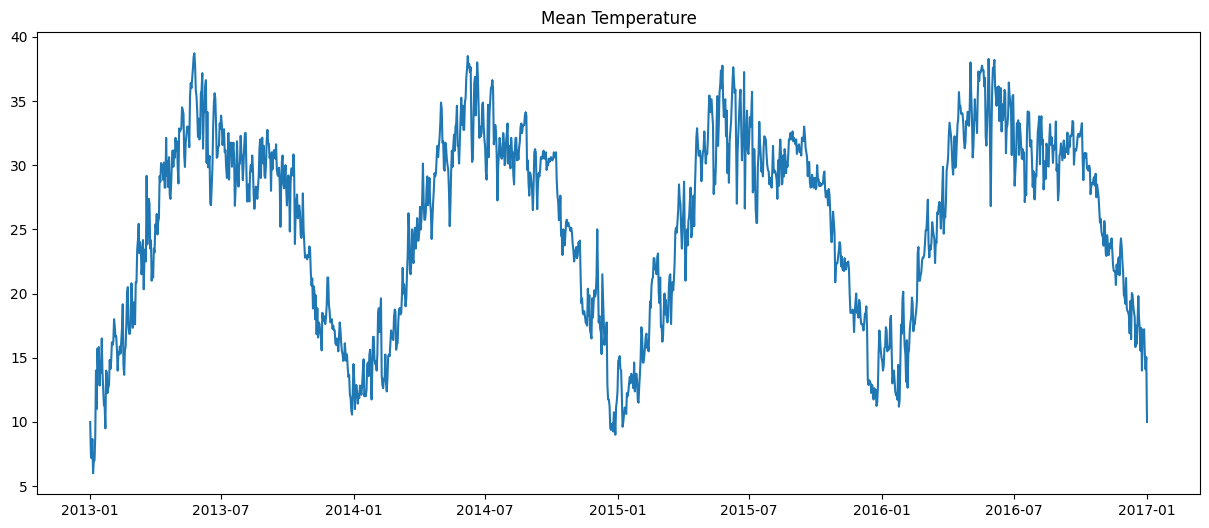

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(train.index,train['meantemp'])
plt.title("Mean Temperature")
plt.show()

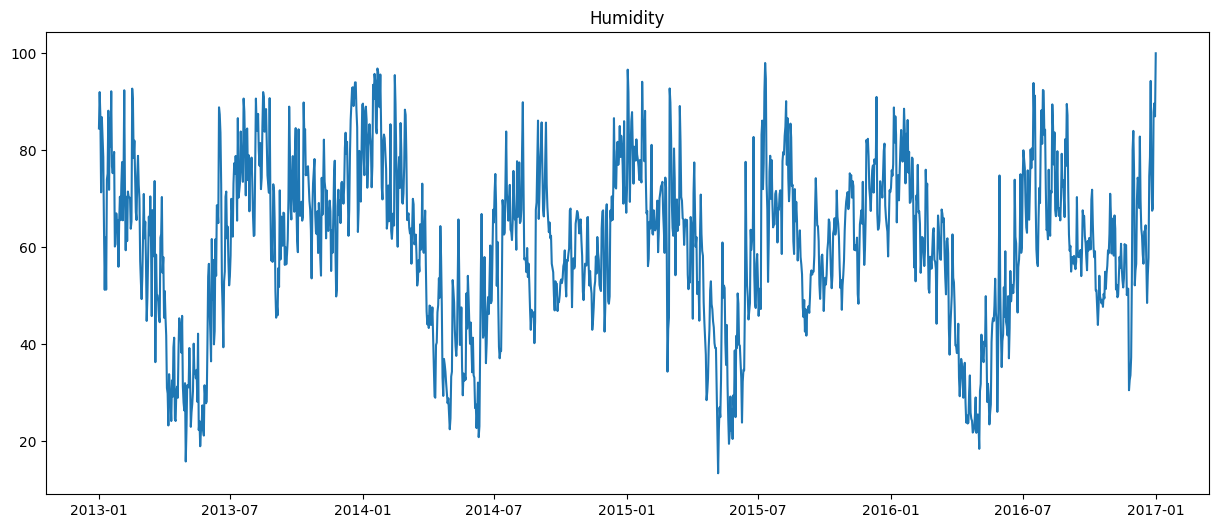

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(train.index,train['humidity'])
plt.title("Humidity")
plt.show()

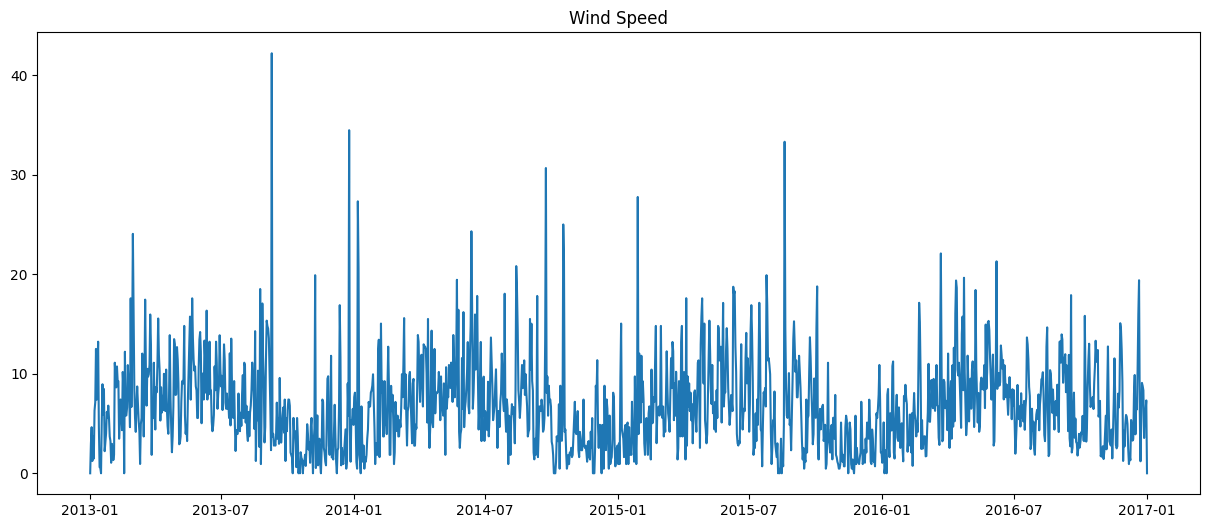

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(train.index,train['wind_speed'])
plt.title("Wind Speed")
plt.show()

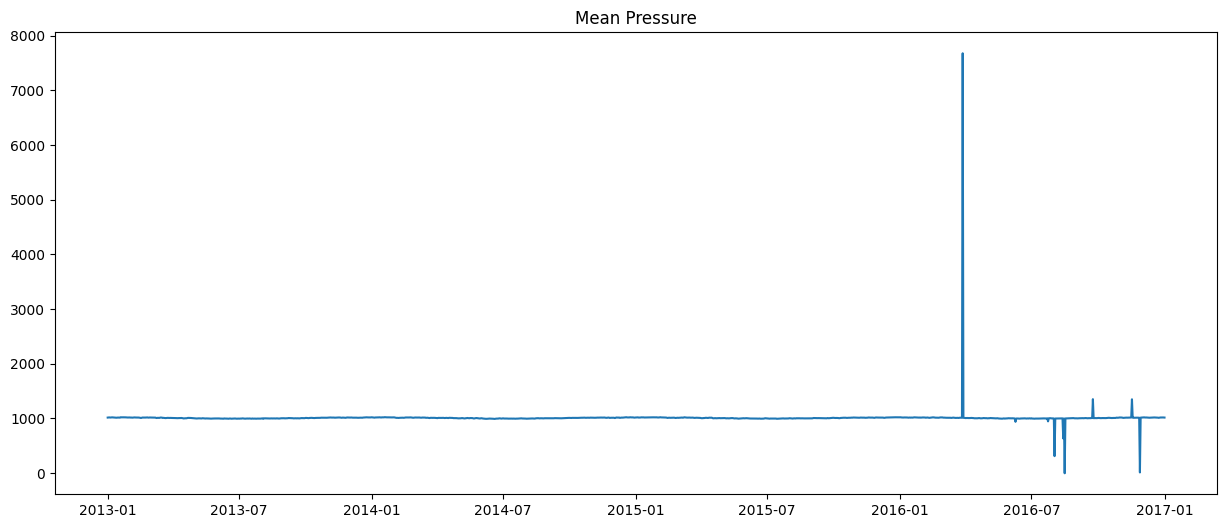

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(train.index,train['meanpressure'])
plt.title("Mean Pressure")
plt.show()

In [ ]:
# Handle meanpressure'outliners
train.loc[1200 < train['meanpressure'] ,'meanpressure'] = np.nan
train.loc[950 > train['meanpressure'] ,'meanpressure'] = np.nan
train.interpolate(method='linear',inplace=True)

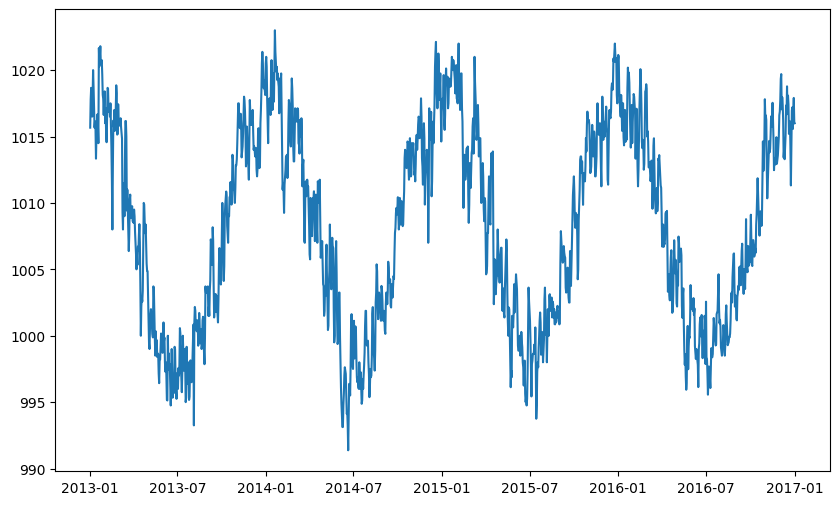

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train.index,train['meanpressure'])
plt.show()

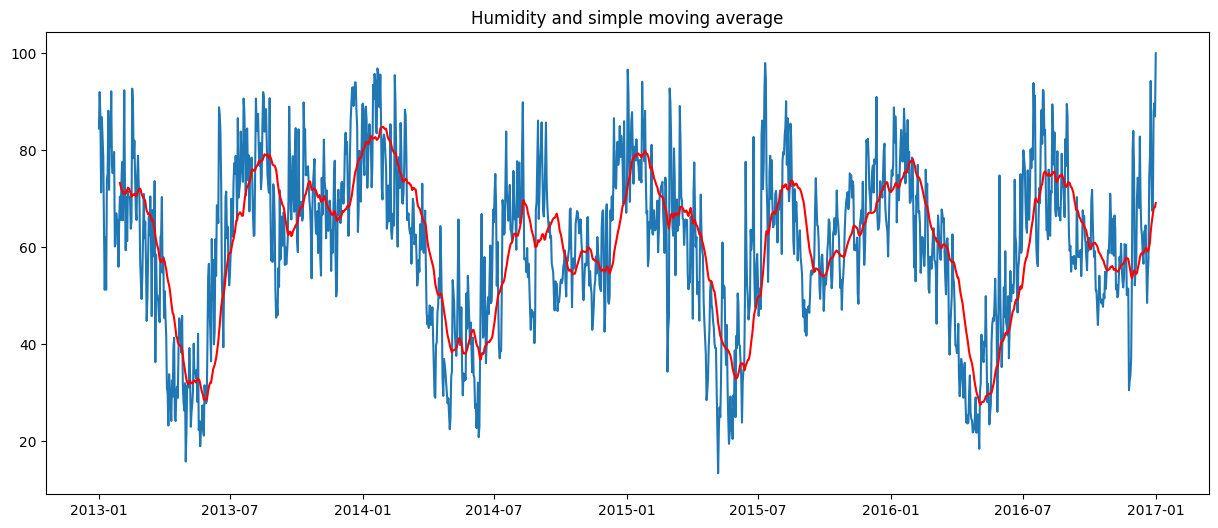

In [ ]:
# The humidity column uses a simple moving average in the smoothing technique.
train['SMA_30']=train['humidity'].rolling(window=30).mean()
plt.figure(figsize=(15,6))
plt.plot(train.index,train['humidity'])
plt.plot(train.index,train['SMA_30'],color='red')
plt.title("Humidity and simple moving average")
plt.show()

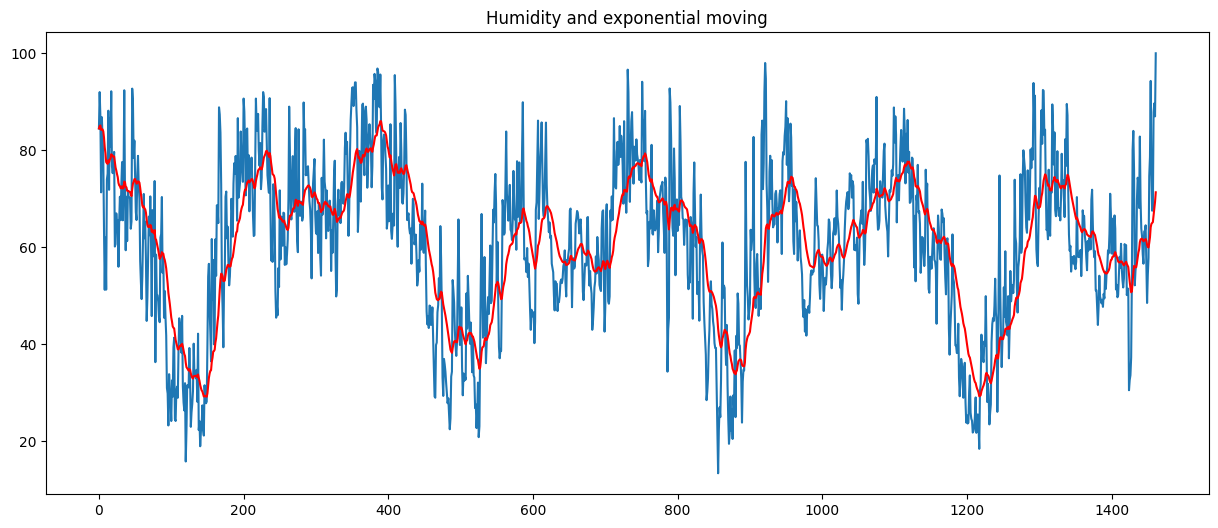

In [ ]:
train['EMA_30_1']=train['humidity'].ewm(span=30,adjust=False).mean()
plt.figure(figsize=(15,6))
plt.plot(train.index,train['humidity'])
plt.plot(train.index,train['EMA_30_1'],color='red')
plt.title("Humidity and exponential moving")
plt.show()

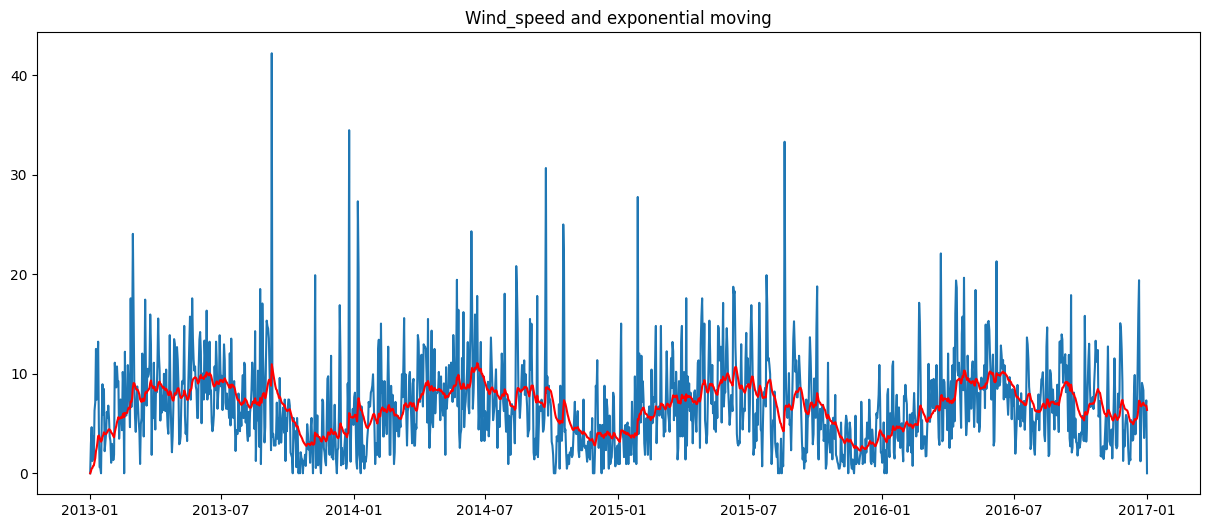

In [ ]:
# The wind_speed column uses exponential moving in the smoothing technique Average.
train['EMA_30']=train['wind_speed'].ewm(span=30,adjust=False).mean()
plt.figure(figsize=(15,6))
plt.plot(train.index,train['wind_speed'])
plt.plot(train.index,train['EMA_30'],color='red')
plt.title("Wind_speed and exponential moving")
plt.show()

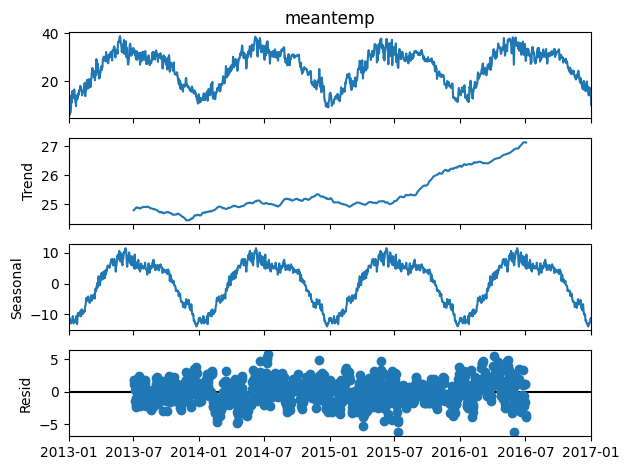

In [ ]:
# Decomposition
# Since the seasonality and trends of the time series are relatively stable
# Choose an additive model
decom = seasonal_decompose(train['meantemp'],model='additive',period=365)
decom.plot()
plt.show()


Trend : The average temperature shows an overall upward trend. As time goes by, the average temperature gradually increases.

Seasonal : Average temperature has strong seasonal characteristics.

Residual : The residuals are relatively evenly distributed around zero, indicating that most of the variation has been explained by trend and seasonality.

# **Assignment 1(time trend models)+Assignment2**

In [ ]:
# Time Trend Model: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
train = pd.read_csv("/content/DailyDelhiClimateTrain.csv" , sep = ",")
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
test = pd.read_csv("/content/DailyDelhiClimateTest.csv" , sep = ",")
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
features = train[['humidity', 'wind_speed', 'meanpressure']]
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]
print(vif_data)

        feature        VIF
0      humidity  10.345016
1    wind_speed   3.065794
2  meanpressure  13.741985


In [ ]:
train0=train.iloc[0:-1,:]
X = train0.drop(['date','meantemp'], axis=1)
y = train0['meantemp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict = lr.predict(X_test)
y_predict[:10]

array([32.77098377, 21.29332163, 26.08719925, 35.61090767, 22.69566517,
       22.94739031, 19.22880824, 23.9145811 , 24.84129199, 31.32272273])

In [ ]:
mse = mean_squared_error(y_test, y_predict)
print('Mean Squared Error:', mse)

Mean Squared Error: 36.773127518443694


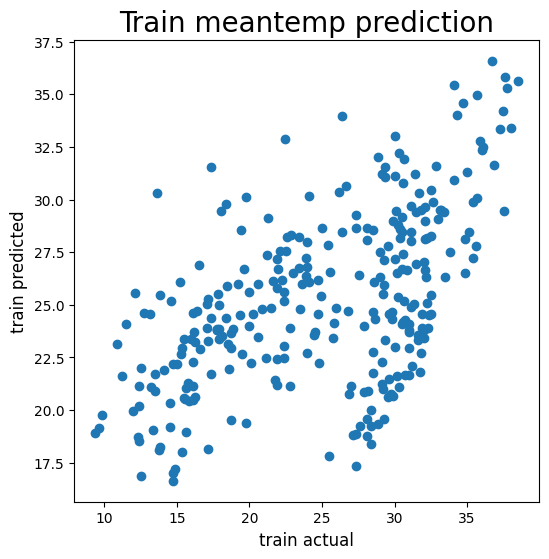

In [ ]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title('Train meantemp prediction',fontsize=20)
ax.set_ylabel('train predicted',fontsize=12)
ax.set_xlabel('train actual',fontsize=12)
ax.scatter(y_test,y_predict)
plt.show()

In [ ]:
testX = test.drop(['date','meantemp'], axis=1)
testy = test['meantemp']

In [ ]:
testy_predict = lr.predict(testX)

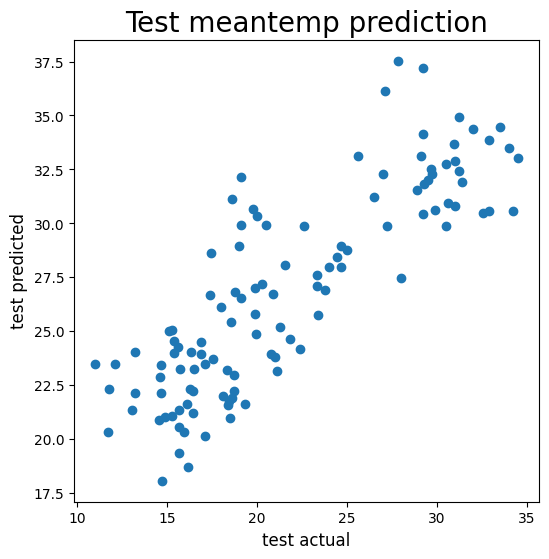

In [ ]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title('Test meantemp prediction',fontsize=20)
ax.set_ylabel('test predicted',fontsize=12)
ax.set_xlabel('test actual',fontsize=12)
ax.scatter(testy,testy_predict)
plt.show()

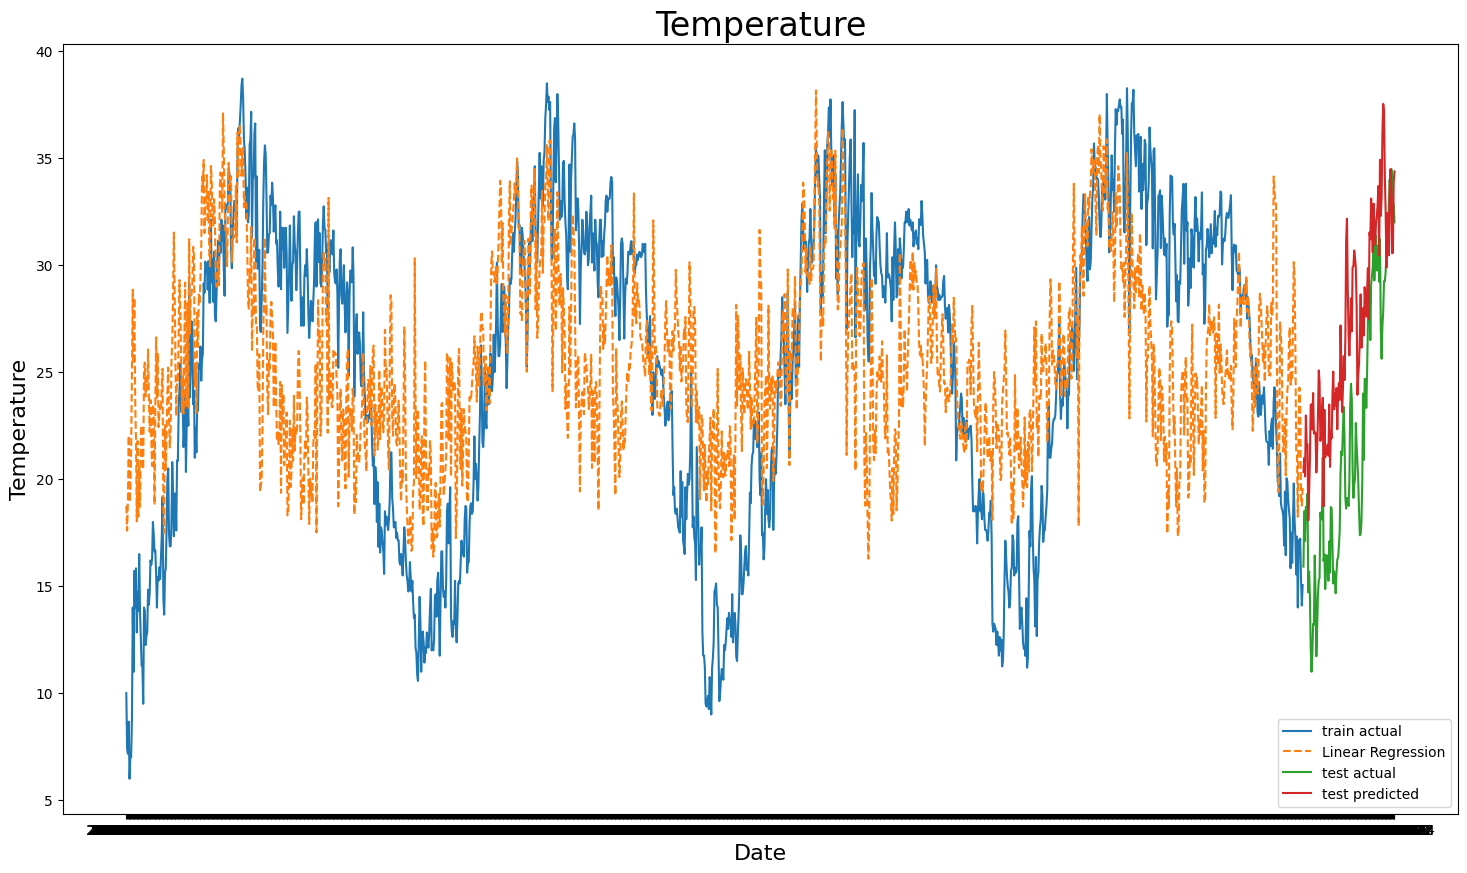

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(train0['date'],train0['meantemp'],label='train actual')
plt.plot(train0['date'],p,'--',label='Linear Regression')
plt.plot(test['date'],test['meantemp'],label='test actual')
plt.plot(test['date'],testy_predict,label='test predicted')
plt.title('Temperature',size=24)
plt.xlabel('Date',size=16)
plt.ylabel('Temperature',size=16)
plt.legend()
plt.show()

#**Assignment 3**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
train = pd.read_csv("/content/DailyDelhiClimateTrain.csv" , sep = ",")
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
test = pd.read_csv("/content/DailyDelhiClimateTest.csv" , sep = ",")
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.9 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
humidity=train['humidity']
humidity.isnull().sum()

0

In [ ]:
result = adfuller(humidity.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
# p-value<0.05 ,we have enough evidence to reject H0 , therefore the time series is stationary

ADF Statistic: -3.675576919163339
p-value: 0.004470100478130758


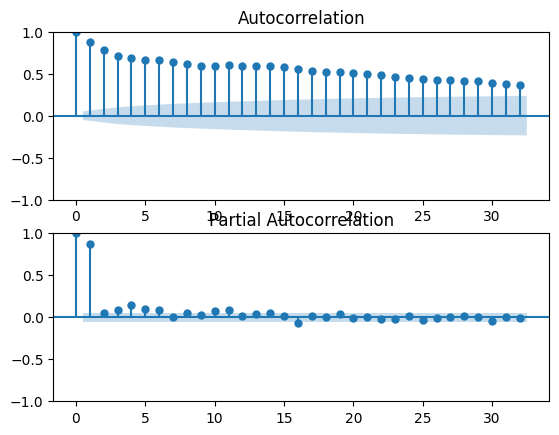

In [ ]:
# Autocorrelation function (ACF) and partial autocorrelation function (PACF) plots.
# Assist in determining ARIMA model .
fig,ax=plt.subplots(2,1)
plot_acf(humidity,ax=ax[0])
plot_pacf(humidity,ax=ax[1],method='ywm')
plt.show()

In [ ]:
# Automatically identify and fit the best ARIMA model.
auto_model=auto_arima(humidity,start_p=0, start_q=0,
                      test='adf',
                      max_p=3, max_q=3,
                      m=1,
                      d=None,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16267.427, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=14532.758, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=10300.535, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=10183.589, Time=0.90 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=10176.873, Time=0.71 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=10187.588, Time=1.69 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=10178.230, Time=2.33 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=10164.823, Time=2.99 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=10171.894, Time=2.36 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=10226.277, Time=0.44 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=10164.681, Time=3.05 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   :

In [ ]:
model2 = ARIMA(humidity, order=(2,0,3),trend='c')
model2_fit = model2.fit()
print(model2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               humidity   No. Observations:                 1462
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -5074.238
Date:                Sat, 10 Feb 2024   AIC                          10162.475
Time:                        08:40:19   BIC                          10199.488
Sample:                             0   HQIC                         10176.282
                               - 1462                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.1838      4.000     15.545      0.000      54.343      70.024
ar.L1          1.3174      0.116     11.322      0.000       1.089       1.545
ar.L2         -0.3294      0.113     -2.912      0.0

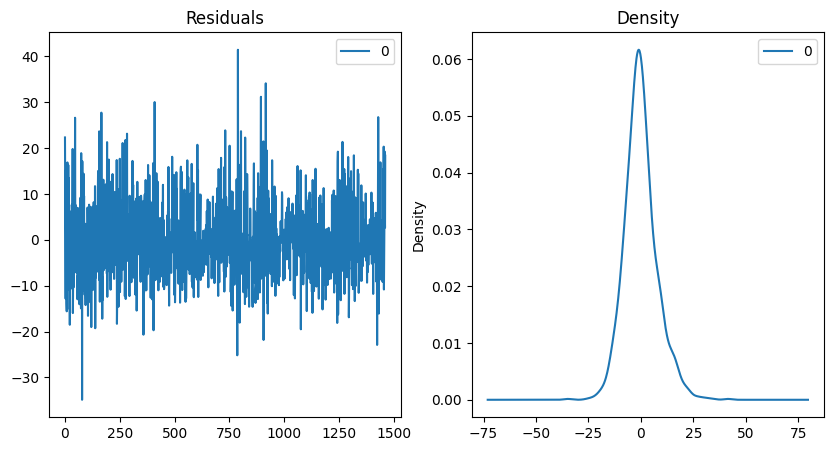

In [ ]:
residuals = pd.DataFrame(model2_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(10, 5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
forecast = model2_fit.forecast(steps=1000)

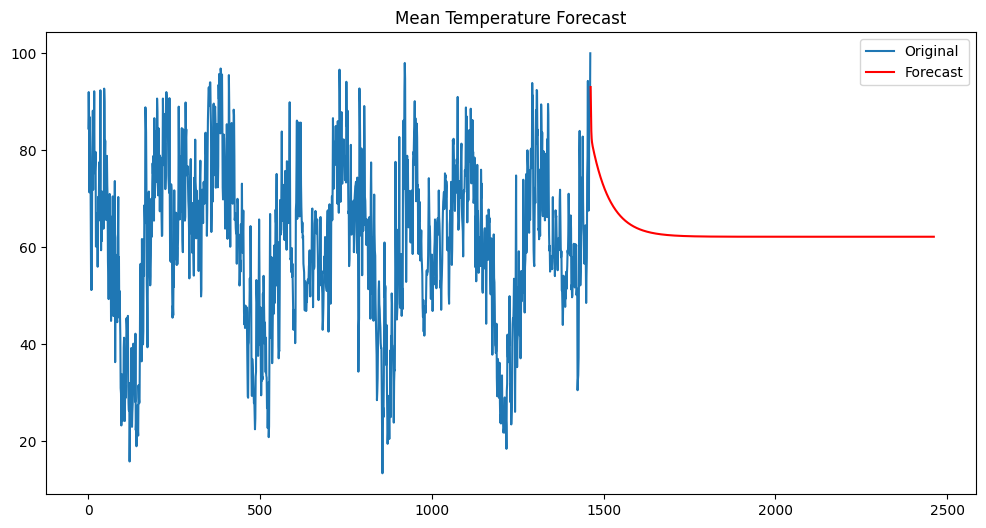

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(humidity, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Mean Temperature Forecast')
plt.legend()
plt.show()